In [12]:
import pandas as pd
import numpy as np
from pycaret.classification  import *
from fast_ml import eda
from sys import path
import os
path.append(os.path.abspath(os.path.join('..')))

In [13]:
df = pd.read_parquet('../data/selected_data.parquet')

In [14]:
df.columns

Index(['Vmag', 'RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE', 'DE:RA', 'BTmag',
       'VTmag', 'B-V', 'V-I', 'Hpmag', '(V-I)red', 'd', 'T', 'M_v', 'M_Hip',
       'Tipo_espectral'],
      dtype='object')

In [15]:
eda.df_info(df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Vmag,float32,Numerical,1113,"[8.130000114440918, 8.460000038146973, 8.85000...",0,0.0
RAdeg,float64,Numerical,107549,"[38.20592381, 38.33578505, 168.61947293000003,...",0,0.0
DEdeg,float64,Numerical,107549,"[61.37836045, 61.52172056, -61.34420395357142,...",0,0.0
Plx,float64,Numerical,5139,"[1.47, 2.13, 10.989999999999998, 2.33, 1.85, 2...",0,0.0
pmRA,float64,Numerical,24677,"[-2.34, -0.08, -65.70214285714286, -30.82, -7....",0,0.0
pmDE,float64,Numerical,22323,"[-0.72, -2.36, -6.615714285714286, 16.77, -2.5...",0,0.0
DE:RA,float64,Numerical,412,"[-0.2, -0.17, 0.14214285714285715, -0.07, -0.0...",0,0.0
BTmag,float64,Numerical,10589,"[8.91, 8.875, 9.1995, 1.957, 7.914, 9.66307142...",0,0.0
VTmag,float64,Numerical,9818,"[8.223, 8.493, 8.393071428571428, 2.189, 7.589...",0,0.0
B-V,float32,Numerical,3167,"[0.6349999904632568, 0.3619999885559082, 0.953...",0,0.0


In [16]:
#Removemos los valores nan de la columna Transported(es la columna objetivo, pycaret necesita los datos limpios, sirva esto como un ejemplo para pycaret no de tratamiendo)
df = df.dropna(subset=['Tipo_espectral']) 

In [17]:
#aplicamos un encoder a nuestro dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df:
    df[column] = le.fit_transform(df[column])


In [18]:
#Creamos nuestro setup con la columna objetivo
setup = setup(df, target='Tipo_espectral', session_id=357, preprocess=False, train_size=0.8)

In [19]:
#Creamos una evaluación rápida de modelos
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:51:21
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [20]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


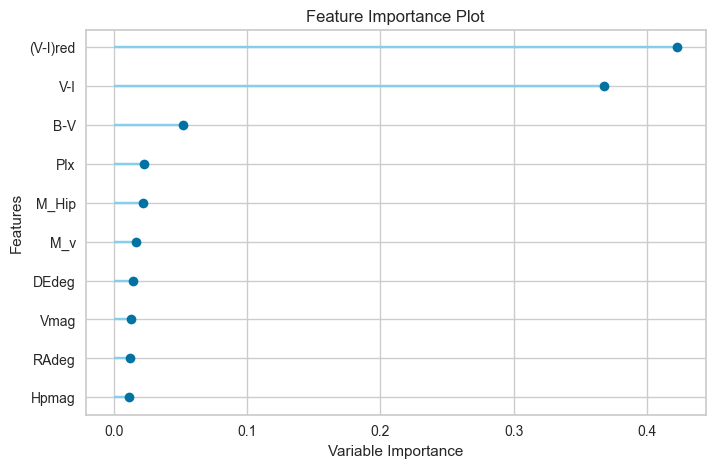

In [21]:
# plot feature importance
plot_model(best, plot = 'feature' )

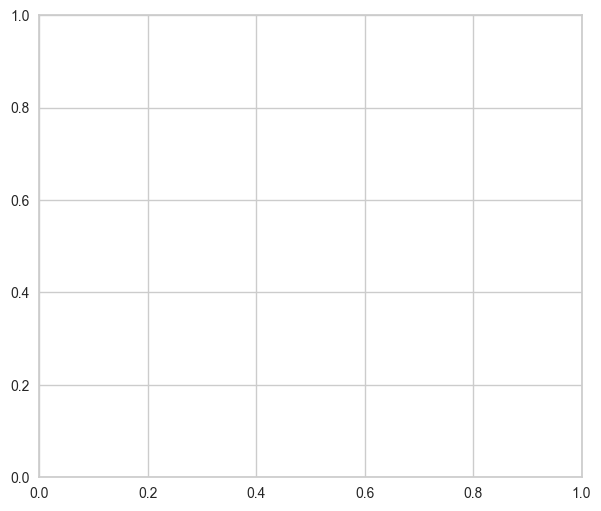

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>

In [22]:
evaluate_model(best) #otra manera 

In [23]:
# predicción modelo
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8330,0.9741,0.8330,0.8314,0.8318,0.7884,0.7886


In [26]:
# vemos las predicciones
holdout_pred.head()

,Vmag,RAdeg,DEdeg,Plx,pmRA,pmDE,DE:RA,BTmag,VTmag,B-V,V-I,Hpmag,(V-I)red,d,T,M_v,M_Hip,Tipo_espectral,prediction_label,prediction_score
19804,517,95545,11856,478,15760,8765,201,2724,3026,388,60,10642,50,4405,2218,26426,29638,0,0,0.9970
12451,641,351,31458,225,13721,13897,160,3921,4801,292,43,21705,45,4658,2314,27827,30628,0,0,0.9617
94757,622,29904,34278,64,11890,15009,163,7193,4748,2222,572,20815,192,4819,384,6668,7670,4,4,0.9690
31353,682,19574,19475,634,10606,14617,131,4890,5928,669,133,26363,82,4249,1937,62982,73016,2,2,0.9223
91394,506,57637,56416,880,12475,12650,60,4029,3034,1749,455,10755,148,4004,857,44697,54376,4,4,0.9434


In [27]:
# Hago una copia de los datos y elimino la variable objetivo
new_data = df.copy()
new_data.drop('Tipo_espectral', axis=1, inplace=True)
new_data.head()

,Vmag,RAdeg,DEdeg,Plx,pmRA,pmDE,DE:RA,BTmag,VTmag,B-V,V-I,Hpmag,(V-I)red,d,T,M_v,M_Hip
0,623,10551,98565,47,11690,13429,81,4593,4634,995,224,21077,106,4836,1611,5092,5907
1,656,10601,98634,114,11921,13259,92,4544,5281,669,133,23825,81,4769,1937,16246,18459
2,695,48631,7671,1105,5714,12823,198,5022,5043,1467,374,28480,134,3780,1139,79104,91122
3,55,34932,23560,135,8799,15202,121,28,51,20,16,56,18,4748,2586,8,6
4,565,88146,85495,86,11133,13240,134,3445,3568,612,119,15012,87,4797,1994,4611,4971


In [28]:
# Pruebo mi modelo de predicción con el nuevo dataset guardado como new_data #estan vacios ya que el resultado se guardo en "predictions"
predictions = predict_model(best, data = new_data)
predictions.head()

,Vmag,RAdeg,DEdeg,Plx,pmRA,pmDE,DE:RA,BTmag,VTmag,B-V,V-I,Hpmag,(V-I)red,d,T,M_v,M_Hip,prediction_label,prediction_score
0,623,10551,98565,47,11690,13429,81,4593,4634,995,224,21077,106,4836,1611,5092,5907,1,0.8098
1,656,10601,98634,114,11921,13259,92,4544,5281,669,133,23825,81,4769,1937,16246,18459,6,0.8247
2,695,48631,7671,1105,5714,12823,198,5022,5043,1467,374,28480,134,3780,1139,79104,91122,6,0.7269
3,55,34932,23560,135,8799,15202,121,28,51,20,16,56,18,4748,2586,8,6,6,0.8540
4,565,88146,85495,86,11133,13240,134,3445,3568,612,119,15012,87,4797,1994,4611,4971,6,0.7638


In [29]:
#finalizado el modelo 
finalize_model(best)

Pipeline(memory=FastMemory(location=/var/folders/l7/2cl9nrjs74bc3y72c8n3j2k80000gp/T/joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 XGBClassifier(base_score=None, booster='gbtree',
                               callbacks=None, colsample_bylevel=None,
                               colsample_byn...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=-1, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))],
         verbose=False)

In [30]:
# #guardo el modelo
save_model(best, 'hyp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/l7/2cl9nrjs74bc3y72c8n3j2k80000gp/T/joblib),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  XGBClassifier(base_score=None, booster='gbtree',
                                callbacks=None, colsample_bylevel=None,
                                colsample_bynode...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=None, max_leaves=None,
                                min_child_weight=None, missing=nan,
                                monot

In [ ]:
#cargo el modelo
loaded_best_pipeline = load_model('hyp')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/l7/2cl9nrjs74bc3y72c8n3j2k80000gp/T/joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=357))])